In [20]:
import pandas
import numpy
import scipy
import sys
import sklearn
import matplotlib.pyplot as plt

In [21]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.metrics import log_loss
from sklearn.svm import LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [32]:
#data = pandas.read_excel (r"C:\Users\HPPC\Videos\Ph.D files\sorting\desktop new\python related\Untitled Folder\data12.xlsx", sheet_name=0)
data = pandas.read_excel (r"C:\Users\SHRI\Videos\PhD\temparature\Temp clasifi python code\Untitled Folder\NITK_kmc_12.xlsx", sheet_name=0)

In [33]:
dta1= [data]
dta12 = pandas.concat((dta1), axis = 1)
dta12.to_csv ('newdata312.csv',  index=False)
df12= pandas.read_csv ("newdata312.csv")
trans12= df12.T
array12 = trans12.values
X2 = array12[:,:-1]
Y2 = array12[:,-1]

In [34]:
Y2


array(['DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER', 'DENGUE FEVER',
       'DENGUE FEVER', 'TUBERCULOSIS', 'TUBERCULOSIS', 'TUBERCULOSIS',
       'TUBERCULOSIS', 'TUBERCULOSIS', 'TUBERCULOSIS', 'TUBERCULOSIS',
       'TUBERCULOSIS', 'TUBERCULOSIS', 'TUBERCULOSIS',
       'NON INFECTIOUS DISEASES', 'NON INFECTIOUS DISEASES',
       'NON INFECTIOUS DISEASES'

In [35]:
# Split-out validation dataset
validation_size = 0.5
seed = 43
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X2, Y2, test_size=validation_size, random_state=seed)
# Test options and evaluation metric
#seed = 10
scoring = 'accuracy'
seed

43

In [36]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))   
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier())) 
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.560000 (0.058310)


C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.380000 (0.116619)
KNN: 0.600000 (0.083666)
CART: 0.500000 (0.044721)
NB: 0.530000 (0.136382)
SVM: 0.490000 (0.096954)
RF: 0.380000 (0.107703)


C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

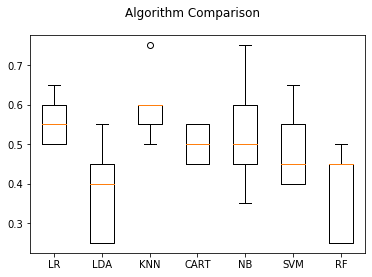

In [37]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [38]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
decesiontree = cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
predictions
print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(X_train, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
#y_pred = cart.fit(X_train, Y_train).predict(X_validation)
#y_pred
#pred = decesiontree.predict(X_validation)


0.52
[[21 12  0  5  0]
 [ 7  7  1  2  0]
 [ 0  0  6  1  1]
 [ 3  4  8 10  1]
 [ 0  0  0  3  8]]
                                     precision    recall  f1-score   support

                       DENGUE FEVER       0.68      0.55      0.61        38
                            MALARIA       0.30      0.41      0.35        17
            NON INFECTIOUS DISEASES       0.40      0.75      0.52         8
NON TUBERCULAR BACTERIAL INFECTIONS       0.48      0.38      0.43        26
                       TUBERCULOSIS       0.80      0.73      0.76        11

                           accuracy                           0.52       100
                          macro avg       0.53      0.57      0.53       100
                       weighted avg       0.55      0.52      0.53       100



In [39]:
# Get the data
from sklearn.datasets import load_digits
#digits = load_digits()
X = X2
y = Y2

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 


# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[82  0  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 46  0]
 [ 0  0  0  0 20]]


In [40]:
from sklearn import model_selection
X = X2
y = Y2

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
metrics.f1_score(y_test, y_pred, average="macro") 

(200, 729), (150, 729), (50, 729)
[[22  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  5  0  0]
 [ 2  0  0  8  0]
 [ 0  0  0  0  6]]
                                     precision    recall  f1-score   support

                       DENGUE FEVER       0.92      1.00      0.96        22
                            MALARIA       1.00      1.00      1.00         7
            NON INFECTIOUS DISEASES       1.00      1.00      1.00         5
NON TUBERCULAR BACTERIAL INFECTIONS       1.00      0.80      0.89        10
                       TUBERCULOSIS       1.00      1.00      1.00         6

                           accuracy                           0.96        50
                          macro avg       0.98      0.96      0.97        50
                       weighted avg       0.96      0.96      0.96        50



0.9690821256038646

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

X = X2
y = Y2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC, DecisionTreeClassifier]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GaussianNB: 0.31333333333333335
KNeighborsClassifier: 0.4514285714285715
LinearSVC: 0.28465608465608466
DecisionTreeClassifier: 0.42000000000000004


C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
X = X2
y = Y2
#class_names = Y2_names
class_names = ['Dengue fever','Maleria','Non-infectious diseases', 'Non-tubercular bacterial infection', 'Tuberculosis']


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\SHRI\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [41]:
from sklearn.metrics import confusion_matrix

labels = class_names
print(disp)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(disp)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'disp' is not defined